This notebook contains exercises related to Capstone Project 1.

Instacart data structure:
   - orders: list of all orders in the dataset. 1 row per order, includes day of the week and time of the day;
   - order_products train: which products (product_id) were ordered; in which order products were added to the cart, and if the product is re-order (1) or not (0);
   - contain the names of products with their corresponding product_id;
   - order_products prior: the structure is the same as order_product_train.csv;
   - aisles contains the aisles;
   - departments: contains the department names.

In [0]:
# We import the needed packages.
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import csv
import seaborn as sns
sns.set()
pd.options.display.latex.repr=True

In [16]:
!rm instacart_prior.zip
!ls

aisles.csv	 order_products_prior.csv  orders.csv	 sample_data
departments.csv  order_products_train.csv  products.csv


In [12]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving instacart_prior.zip to instacart_prior.zip
User uploaded file "instacart_prior.zip" with length 164686327 bytes


In [0]:
# Execute if needed.
# Strings to replace names of files run in online environment.
str_isles = 'aisles.csv'
str_dept = 'departments.csv'
str_prod = 'products.csv'
str_prod_train = 'order_products_train.csv'
str_prod_prior = 'order_products_prior.csv'
str_orders = 'orders.csv'

In [0]:
# Execute if needed.
# Strings for local machine runs
str_isles = 'data/aisles.csv'
str_dept = 'data/departments.csv'
str_prod = 'data/products.csv'
str_prod_train = 'data/order_products_train.csv'
str_prod_prior = 'data/order_products_prior.csv'
str_orders = 'data/orders.csv'

We read the files for data and check them.

For the isles, department frames, we change these into categories.

In [5]:
# isles frame
isles = pd.read_csv(str_isles, index_col='aisle_id')
isles['aisle'].astype('category')
isles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 1 to 134
Data columns (total 1 columns):
aisle    134 non-null object
dtypes: object(1)
memory usage: 2.1+ KB


We change the type of the department data to category.

In [6]:
# department frame dept
dept = pd.read_csv(str_dept, index_col='department_id')
dept.department.astype('category')
dept.head()

,department
department_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol


In [7]:
# product frame
prod = pd.read_csv(str_prod, index_col='product_id')
prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 1 to 49688
Data columns (total 3 columns):
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [8]:
# train frame
train = pd.read_csv(str_prod_train, index_col=['order_id', 'product_id'])
train.info()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1384617 entries, (1, 49302) to (3421070, 4724)
Data columns (total 2 columns):
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(2)
memory usage: 33.0 MB


In [9]:
# prior frame
prior = pd.read_csv(str_prod_prior,  index_col = ['order_id', 'product_id'])
prior.info()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 32434489 entries, (2, 33120) to (3421083, 5020)
Data columns (total 2 columns):
add_to_cart_order    int64
reordered            int64
dtypes: int64(2)
memory usage: 767.3 MB


We change eval_set to category. The column has only three values.

In [10]:
orders = pd.read_csv(str_orders, index_col=['user_id', 'order_id'])
orders.eval_set.astype('category')
orders.head(10)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


eval_set  ...  days_since_prior_order
user_id order_id           ...                        
1       2539329     prior  ...                     NaN
        2398795     prior  ...                    15.0
        473747      prior  ...                    21.0
        2254736     prior  ...                    29.0
        431534      prior  ...                    28.0
        3367565     prior  ...                    19.0
        550135      prior  ...                    20.0
        3108588     prior  ...                    14.0
        2295261     prior  ...                     0.0
        2550362     prior  ...                    30.0

[10 rows x 5 columns]

Combining train and prior data frames.

In [11]:
# train and prior contain the same type of data. We combine these two for analysis.
combine = pd.concat([prior, train])
combine.head()

add_to_cart_order  reordered
order_id product_id                              
2        33120                       1          1
         28985                       2          1
         9327                        3          0
         45918                       4          1
         30035                       5          0

We visualize the data.

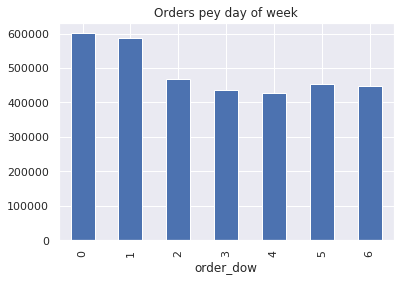

In [14]:
# Visualizing orders by day.
fgroupped_day = orders.groupby('order_dow')['order_number'].count().plot(kind='bar', title='Orders pey day of week')



We check to see data in hourly categories.

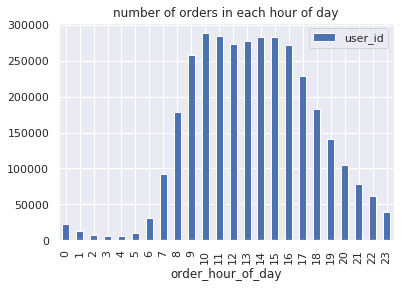

In [26]:
#graphing dayly activities per hour.
orders.groupby('order_hour_of_day').count().plot(kind='bar', y='user_id', title='number of orders in each hour of day')

 We visualize data for inspection.
 
 We see that all orders for 30 days or more are aggregated into a single column.

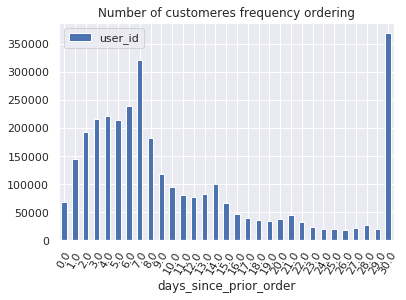

In [27]:
#grouping ordres according to days since prior order
orders.groupby('days_since_prior_order').count().plot(kind='bar', rot=60
                                                         , y='user_id', title='Number of customeres frequency ordering')

We cannot work on pattern where the days are 30 or more, because all orders are aggregated. We are separating these orders from set.

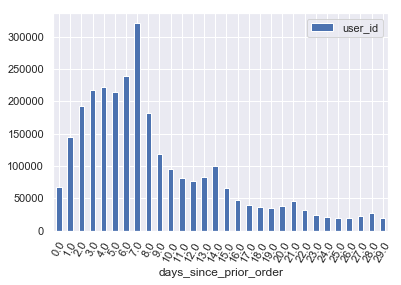

In [0]:
# dropping all observation where days since prior order is 30.
orders_29 = orders.loc[orders['days_since_prior_order'] < 30]
orders_30 = orders.loc[orders['days_since_prior_order']>=30]
orders_29.groupby('days_since_prior_order').count().plot(kind='bar',rot=60, y='user_id')

We save orders in two separate files for further processing: orders_29.csv and orders_30.csv. 

The first file contains all data for orders that are reordes 29 days or less after a prior order. 

The other file contains all orders that are 30 days or more after the previous order.

In [0]:
# saving the separated data in two files for processing
# orders_29.csv and orders_30.csv
fp_orders_29.to_csv('orders_29.csv')
fp_orders_30.to_csv('orders_30.csv')


We investigate relationship between days sinse prior order and number of items purchased. We use trunkated file, because 30 days is an agregate that contains 30 or more days.

In [0]:
str_orders = 'orders_p29.csv'
orders_p29 = pd.read_csv(str_orders, index_col='order_id')
orders_p29.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702528 entries, 2398795 to 2977660
Data columns (total 5 columns):
user_id                   int64
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(4)
memory usage: 123.7 MB


In [0]:
last_item = combine.groupby('order_id').count()['add_to_cart_order']


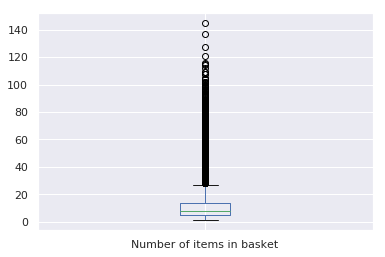

In [66]:
# distribution of how many items in basket. Skewed right.
last_item.plot(kind='box',label='Number of items in basket', )

In [67]:
last_item.describe()

count    3.346083e+06
mean     1.010707e+01
std      7.542326e+00
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.400000e+01
max      1.450000e+02
Name: add_to_cart_order, dtype: float64

We separate all outliers above from the table. We take out all items that are more than 3 sdandard deviation from the mean:
Upper bound = 10.07 + 3*7.51 = 32.6.

In [68]:
# separate all upper outliers
high_orders = last_item.loc[last_item > 32]
high_orders.describe()


count    50573.000000
mean        39.036423
std          6.985325
min         33.000000
25%         34.000000
50%         37.000000
75%         41.000000
max        145.000000
Name: add_to_cart_order, dtype: float64

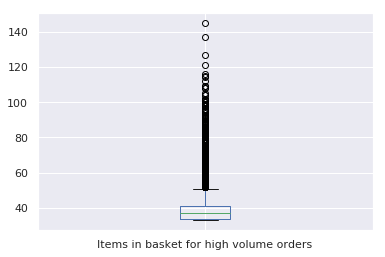

In [69]:
high_orders.plot(kind='box', label='Items in basket for high volume orders')

We look for the outliers for the high volume order, using the bound
39 + 3*7 = 60.

In [50]:
high_orders.loc[high_orders>60].sort_values().head()

order_id
1171       61
1573104    61
446779     61
1507354    61
2504623    61
Name: add_to_cart_order, dtype: int64

What percent are the high order items compared to all items ordered?

In [70]:
percent_high_items = high_orders.sum()/last_item.sum()
percent_of_hig = high_orders.count()/last_item.count()
print('The high orders are ' + str(percent_of_hig) + '% from all orders,')
print('but they account for '+ str(percent_high_items) + '% from all items.')

The high orders are 0.015114090116712586% from all orders,
but they account for 0.05837496118318444% from all items.


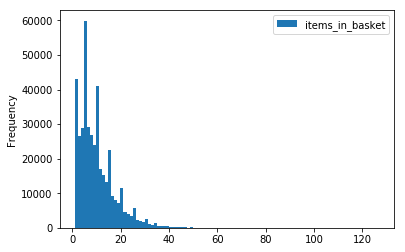

In [0]:
# distribution of number of items in a basket for all orders made prior to 30 days.
orders_p29.plot(kind='hist', y='items_in_basket', bins=100)

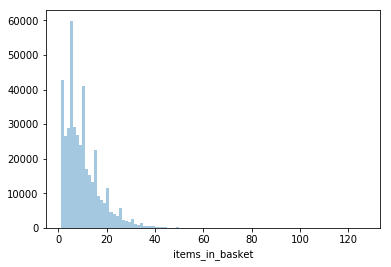

In [0]:
# create seaborn historgram
sns.distplot(orders_p29['items_in_basket'], kde=False, bins=100)

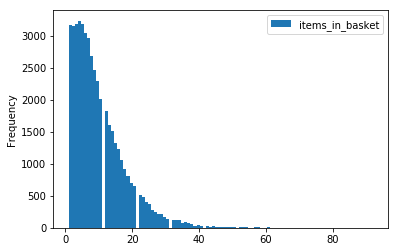

In [0]:
# distribution of number of items ordered when order comes no less than 30 days after prior order. 
str_orders = 'orders_p30.csv'
orders_p30 = pd.read_csv(str_orders, index_col='order_id')
orders_p30['items_in_basket'] = last_item
orders_p30.plot(kind='hist', y='items_in_basket',bins=100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42353 entries, 144358 to 85132
Data columns (total 6 columns):
user_id                   42353 non-null int64
order_number              42353 non-null int64
order_dow                 42353 non-null int64
order_hour_of_day         42353 non-null int64
days_since_prior_order    42353 non-null float64
items_in_basket           42353 non-null float64
dtypes: float64(2), int64(4)
memory usage: 2.3 MB


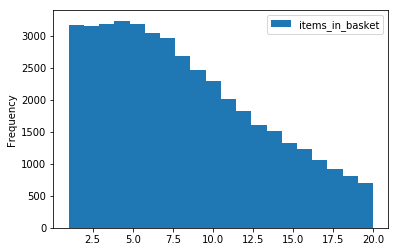

In [0]:
# low orders 30 distribution
low_orders = orders_p30.loc[ (orders_p30['items_in_basket'] < 21)]
low_orders.plot(kind='hist', y='items_in_basket',bins=20)
low_orders.info()

The frequency distribution table below confirms there are no gaps in distribution as shown above.

In [0]:
# check frequency distribution from main graph above.
# remove # to see output.
freq_dist = pd.Series(orders_p30['items_in_basket'])
#freq_dist.value_counts(ascending = True) 

In [0]:
# grouping orders per user.
# we may need the full set of rows from order-product-prior. 
orders_p = pd.read_csv('orders_p.csv')
orders_p['items_in_basket'] = last_item
# %whos

In [0]:
# ???
group_byuser = orders_p.groupby('user_id')['items_in_basket']


In [71]:
# most common orders
most_products = prior.groupby('product_id').count()['reordered']
most_reorders = prior.groupby('product_id').sum()['reordered']

most_products = pd.merge(left=most_products, right=most_reorders, left_on='product_id', right_on='product_id')
most_products = pd.merge(left=prod['product_name'], right=most_products, left_on='product_id', right_on='product_id')

most_products.sort_values('reordered_x', inplace=True, ascending=False)
most_products.head(30)

,product_name,reordered_x,reordered_y
product_id,,,
24852,Banana,472565,398609
13176,Bag of Organic Bananas,379450,315913
21137,Organic Strawberries,264683,205845
21903,Organic Baby Spinach,241921,186884
47209,Organic Hass Avocado,213584,170131
47766,Organic Avocado,176815,134044
47626,Large Lemon,152657,106255
16797,Strawberries,142951,99802
26209,Limes,140627,95768


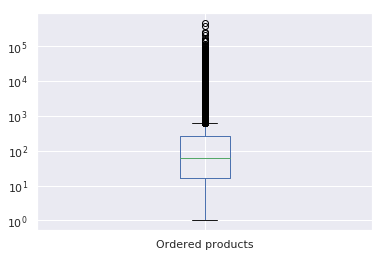

In [72]:
# most ordered products box plot
most_products.plot(kind='box', y='reordered_x', logy=True, label='Ordered products') # most commonly ordered products

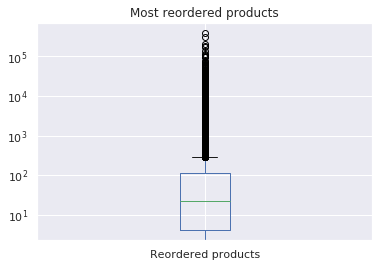

In [73]:
# most reordered products
most_products.plot(kind='box', y='reordered_y', logy=True, label='Reordered products', title='Most reordered products')

In [77]:
# which product was ordered first
ordered_first = prior.loc[prior.add_to_cart_order==1]
ordered_first['product_name'] = prod['product_name']
ordered_first.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,,add_to_cart_order,reordered,product_name
order_id,product_id,,,
2,33120,1,1,NaN
3,33754,1,1,NaN
4,46842,1,0,NaN
5,13176,1,1,NaN
6,40462,1,0,NaN


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


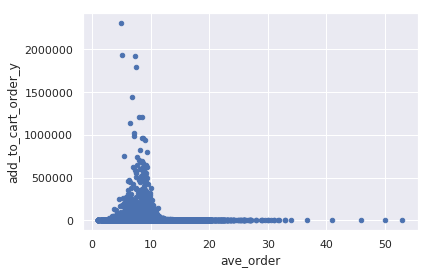

In [75]:
# are more frequent items ordered first?
# number of times an item is ordered, sorted
frequency_count = prior.groupby('product_id').count()['add_to_cart_order'].sort_values(ascending=False)
# summing add_to_cart_order to find average order value
sum_add_to_order = prior.groupby('product_id')['add_to_cart_order'].sum()

# merging the two data frames.
frequency_count = pd.merge(left=frequency_count, right=sum_add_to_order, left_on='product_id', right_on='product_id')
# new column - ave_order to show when on average in the list the item is ordered.
frequency_count['ave_order'] = frequency_count['add_to_cart_order_y'] / frequency_count['add_to_cart_order_x']

# plotting the ave_order.
frequency_count.plot(kind='scatter', y='add_to_cart_order_y', x='ave_order')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


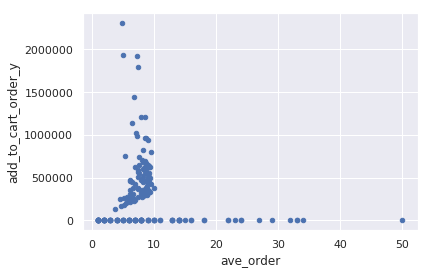

In [76]:
# plotting the top 50 and bottom 50 items from the graph above.
freq_top = frequency_count.head(100)
freq_bot = frequency_count.tail(100)

# concatenating top and bottom parts to plot together.
freq = pd.concat([freq_top, freq_bot], axis=0)
freq.plot(kind='scatter', y='add_to_cart_order_y', x='ave_order')

$  \sqrt{\hat{p} (1-\hat{p}) \left(\frac{1}{n_1} +\frac{1}{ n_2} \right)} < \left| \hat{p}_1 - \hat{p}_2 \right|, $